## A classification task: record label recognition


In [2]:
#Basic imports
import os
import matplotlib.pyplot as plt
import essentia.standard as ess
import essentia
import numpy as np
import sys

In [3]:
#Raw-data preprocess analysis parameters
fs = 44100
windowSize = 4096 * 4
hopSize = 4096 * 2 
NRG_threshold_ratio = 0.01 #threshold expressed as ratio with respect to the maximum value
V_threshold = 0.01 #waveform threshold value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "V_threshold":V_threshold}

## Analysis and preprocessing of features



In [4]:
import pandas as pd

In [5]:
#Read 
file = 'NRG_chunks_30s/data_NRG_chunks_30s.csv'
data = pd.read_csv(file)
#Let's see the first lines of our data
print(data.shape)
data.head()

(2547, 111)


,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,label
0,0.988186,20.478498,4.089674,0.379634,0.117483,160.641403,198.192886,8.975998,5.951560,12.921071,...,2.388727,0.630828,0.597704,0.590780,0.576712,0.519700,0.264084,434.193115,0.914482,suaraarchive
1,0.968379,15.320263,6.943198,0.171818,0.090113,26.312613,69.235451,3.349055,3.365176,29.381922,...,2.579776,0.895548,0.437140,0.432375,0.453034,0.617205,0.201986,434.193115,0.857048,suaraarchive
2,0.961911,14.853801,6.487042,0.309190,0.134920,36.727467,61.274410,3.712230,2.883528,12.519576,...,2.466795,0.769552,0.639024,0.656498,0.667925,0.449289,0.139628,434.193115,0.786461,suaraarchive
3,0.984195,19.392551,4.652277,0.236884,0.071677,70.987419,86.121933,6.727059,3.746682,11.425290,...,2.289503,0.803594,0.702167,0.709757,0.708595,0.596609,0.109998,440.254242,0.737786,suaraarchive
4,0.989017,15.688944,7.368422,0.212260,0.122203,40.260254,53.379383,4.249978,2.831521,17.101896,...,2.521369,0.769857,0.608317,0.604574,0.602309,0.455554,0.209978,434.193115,0.915794,suaraarchive


In [6]:
data.isnull().sum().sum()#sums a matrix of True/False values obtained by checking if each value is Nan

0

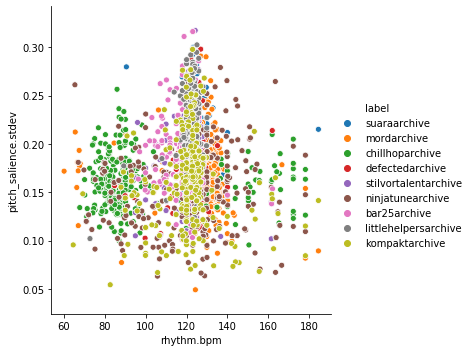

In [7]:
import seaborn as sns
# hue -> Grouping variable that will produce elements with different colors
# style -> Grouping variable that will produce elements with different styles
sns.relplot(x = "rhythm.bpm", y = "pitch_salience.stdev", hue = "label", data = data);

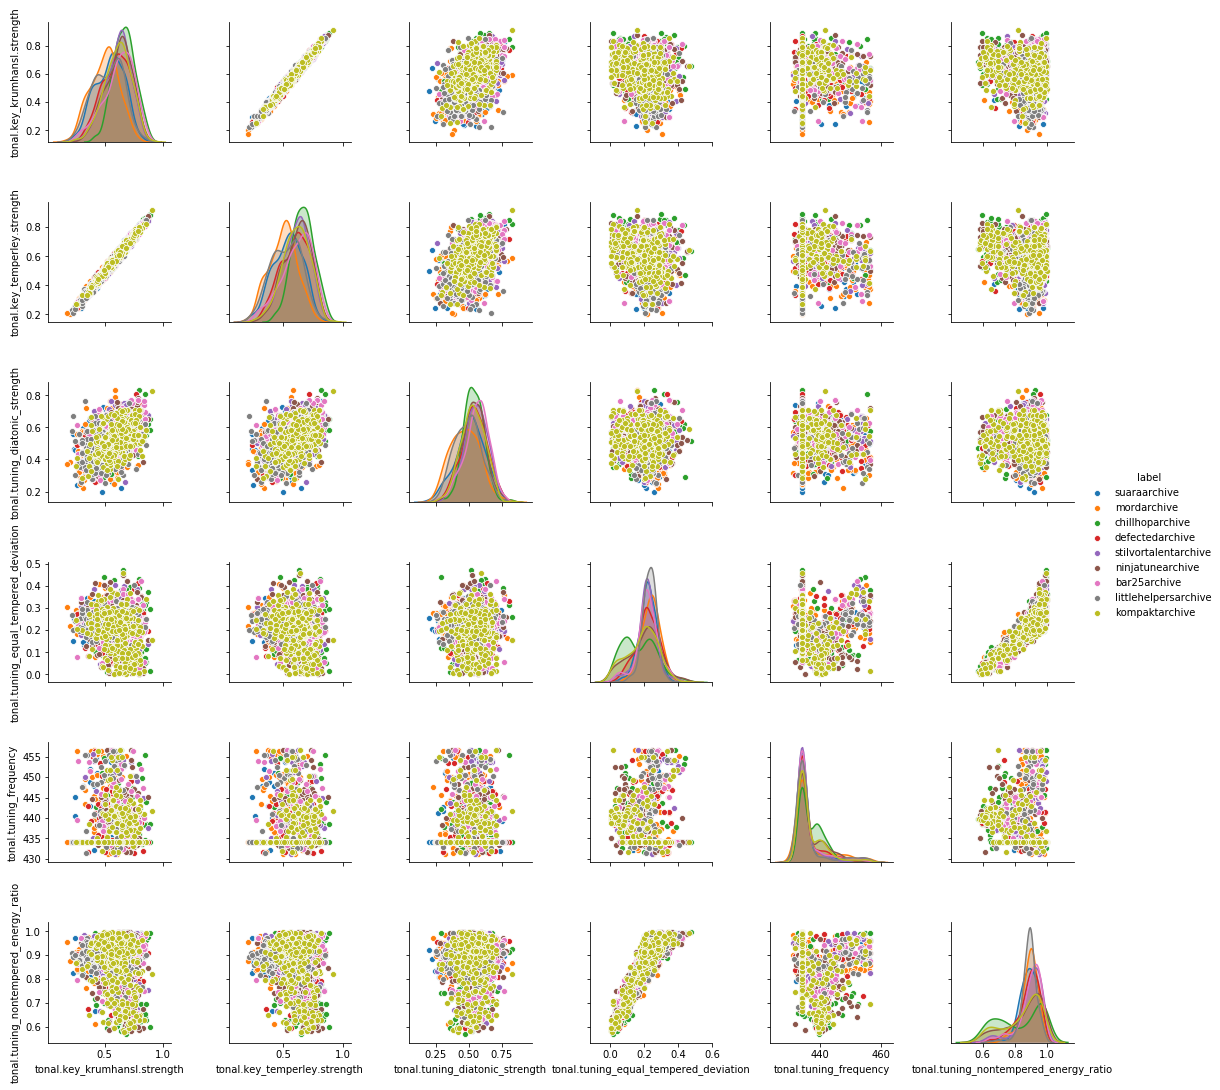

In [8]:
sns.pairplot(data.iloc[:, -7:], hue = "label");

In [9]:
#Descriptive statistics of the features:
data.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,...,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000
mean,0.947666,15.715007,5.658436,0.260513,0.106469,69.459303,140.784210,4.368448,3.980944,15.031490,...,5.632451,2.156774,0.720888,0.589712,0.590067,0.587646,0.526149,0.211041,436.627325,0.876017
std,0.087113,2.750704,1.056327,0.082173,0.038751,74.863570,182.434036,2.051200,2.174899,8.242901,...,1.137953,0.361565,0.097207,0.127488,0.127899,0.126574,0.099655,0.075410,4.895503,0.091435
min,0.003149,5.271559,1.364020,0.079238,0.018111,-0.159705,0.940838,-0.445303,0.328427,0.456950,...,3.104148,0.940521,0.377700,0.180974,0.177397,0.204350,0.194460,0.001711,431.193909,0.569442
25%,0.951348,13.820430,4.963433,0.201848,0.079836,20.922656,38.329506,2.866455,2.411770,8.901004,...,4.786724,1.894417,0.656128,0.504241,0.503602,0.500839,0.462513,0.175608,434.193115,0.846666
50%,0.975945,15.688944,5.669226,0.251875,0.102127,46.605518,87.237122,4.065837,3.598405,13.953435,...,5.424810,2.131013,0.721342,0.605424,0.605706,0.598998,0.530480,0.218807,434.193115,0.898706
75%,0.984776,17.733624,6.375322,0.310564,0.128888,89.527054,183.167152,5.557237,5.119765,19.936397,...,6.301334,2.408065,0.783481,0.680836,0.683958,0.680202,0.595523,0.257583,437.465790,0.940349
max,0.990334,24.052708,8.932732,0.637465,0.294311,755.069397,3244.098877,16.527456,18.975241,70.538437,...,10.681671,3.528310,1.106796,0.898272,0.910610,0.918201,0.831871,0.472213,456.570251,0.997200




### Preprocessing of the features

**Normalisation of the features**

In [10]:
data_modif = data.copy()
#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:110] = min_max_scaler.fit_transform(data.iloc[:,:110].values)

In [11]:
data_modif.describe()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,tonal.hpcp_crest.stdev,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio
count,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,...,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000
mean,0.956778,0.556060,0.567391,0.324733,0.319907,0.092183,0.043120,0.283616,0.195879,0.207966,...,0.333658,0.469997,0.470704,0.569830,0.562824,0.536941,0.520370,0.444906,0.214113,0.716703
std,0.088243,0.146461,0.139565,0.147203,0.140302,0.099127,0.056252,0.120852,0.116636,0.117619,...,0.150175,0.139720,0.133325,0.177733,0.174436,0.177311,0.156343,0.160277,0.192916,0.213754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.960508,0.455184,0.475565,0.219641,0.223482,0.027915,0.011528,0.195122,0.111726,0.120489,...,0.222048,0.368614,0.381881,0.450674,0.444899,0.415338,0.420534,0.369598,0.118189,0.648087
50%,0.985424,0.554672,0.568816,0.309259,0.304188,0.061922,0.026609,0.265787,0.175364,0.192583,...,0.306256,0.460042,0.471326,0.591734,0.584154,0.552843,0.527164,0.461412,0.118189,0.769745
75%,0.994370,0.663541,0.662108,0.414394,0.401077,0.118754,0.056188,0.353657,0.256952,0.277954,...,0.421930,0.567103,0.556554,0.696868,0.690879,0.666598,0.629206,0.543828,0.247155,0.867097
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#input values put in a matrix, there are 110 features
x = data_modif.iloc[:,:110]
#Creating output values
data_modif.label = pd.Categorical(data_modif.label)#convert to categorical data
y = np.array(data_modif.label.cat.codes) #create label encoded outputs
#Print the first sample
print("Features of the first sample: ", x.values)
print("Class of the first sample: ", y[0])

Features of the first sample:  [[0.99782457 0.80969166 0.36012134 ... 0.55764355 0.11818908 0.80662499]
 [0.97776015 0.53504204 0.73713711 ... 0.42566172 0.11818908 0.67235846]
 [0.97120819 0.51020532 0.67686843 ... 0.2931257  0.11818908 0.50734165]
 ...
 [0.99228497 0.47058953 0.5748333  ... 0.28608174 0.43739387 0.59917476]
 [0.83034087 0.64531102 0.4781069  ... 0.24878606 0.25711458 0.52502277]
 [0.98600923 0.60155436 0.21116371 ... 0.42226794 0.11818908 0.88573157]]
Class of the first sample:  8


In [13]:
print(y.shape)

(2547,)


In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=100)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(100,'Score'))  #print k best features

                                     Specs       Score
49                 silence_rate_60dB.stdev  135.534350
45                 silence_rate_20dB.stdev  102.710006
19                 erbbands_kurtosis.stdev   86.662288
75                  spectral_rolloff.stdev   66.376858
41                   melbands_spread.stdev   66.262264
..                                     ...         ...
28          loudness_ebu128.momentary.mean    9.679659
109  tonal.tuning_nontempered_energy_ratio    9.637210
96                tonal.chords_number_rate    9.365738
106         tonal.tuning_diatonic_strength    8.857653
98             tonal.chords_strength.stdev    8.847770

[100 rows x 2 columns]


In [15]:
X_new = bestfeatures.fit_transform(x, y)

In [16]:
print ( X_new.shape)

(2547, 100)


In [17]:
from numpy import save
save('y.npy', y)

## SVM TRAINING AND TESTING

In [18]:
#All output values: 
print(y)

[8 8 8 ... 3 3 3]


**Splitting data into train and test subsets**

In [19]:
#Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42) #random_state = 20 or 42

In [20]:
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (2037, 100) , Size of train output vector:  (2037,)
Size of test features matrix:  (510, 100) , Size of test output vector:  (510,)


**Defining the machine learning model and training it**

Now we can train a machine learning model. Let's pick a Support Vector Machine (SVM) model and feed our data to train it.

In [21]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 
#clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))
tuned_parameters = [{'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]}]
                    
 #cross-validation for gamma:
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=10) #C-Support Vector Classification based on libsvm

scores = cross_validate (clf, X_new, y, cv=10, return_estimator=True)
clf= scores ['estimator'][int(np.argmax(scores['test_score']))]
clf.fit(X_train, y_train)   


print(clf.best_params_)                    

{'gamma': 0.3}


**Testing the model**



In [22]:
y_pred = clf.predict(X_test)

In [23]:
#Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([ True, False,  True,  True, False,  True,  True, False,  True,
        True, False,  True, False, False, False,  True, False,  True,
        True, False,  True,  True, False,  True,  True, False, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False, False, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
       False, False,  True,  True, False,  True,  True, False, False,
       False,  True,

In [24]:
#Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.5862745098039216


**Observation:** the accuracy looks good but keep in mind that we have a small dataset and simply obtained a random subset for testing


As the final step, let's also print the **confusion matrix**

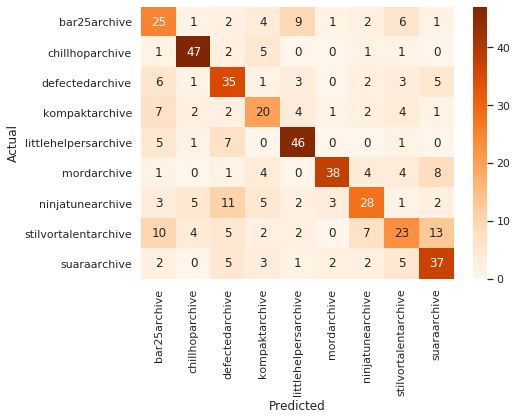

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.label)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1)
sns.heatmap(conf_mat, cmap = "Oranges", annot_kws = {"size": 12}, annot = True);

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.49      0.45        51
           1       0.77      0.82      0.80        57
           2       0.50      0.62      0.56        56
           3       0.45      0.47      0.46        43
           4       0.69      0.77      0.72        60
           5       0.84      0.63      0.72        60
           6       0.58      0.47      0.52        60
           7       0.48      0.35      0.40        66
           8       0.55      0.65      0.60        57

    accuracy                           0.59       510
   macro avg       0.59      0.59      0.58       510
weighted avg       0.59      0.59      0.58       510



In [27]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.4137254901960784

## Other ML FW


In [ ]:
import warnings
warnings.filterwarnings('ignore')#suppress warnings
#importing various classifiers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    #SVC(gamma = 1 / (X_train.shape[-1] * X_train.var())),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(alpha=1, max_iter=1000),
    GaussianNB()]

names = ["KNN", "Linear SVM", "Gaussian Process","Neural Net", "Naive Bayes"] #"RBF SVM"

#Creating empty list of scores for each classifier, we will append test results to these lists 
scores = {}
for name in names:
    scores[name] = []

#Let's split our data into test and train
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

#Let's run 10 random experiments, collect scores for each classifier 
num_tests = 10
for iteration_number in range(num_tests):
    x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = 1/num_tests, random_state = iteration_number)
    #normalisation of the data (learned from training data, applied to test data)
    scaler = StandardScaler().fit(x_train)
    norm_x_train = scaler.transform(x_train)
    norm_x_val = scaler.transform(x_val)
    
    # test over each classifier
    for name, clf in zip(names, classifiers):
        clf.fit(norm_x_train, y_train)#train
        score = clf.score(norm_x_val, y_val)#test
        scores[name].append(score)

for name, score in scores.items():
    print("{0}: acc = {1:1.2f}, +-{2:1.2f},\tvalues: {3}".format(name, np.mean(score), np.std(score), np.around(score, decimals = 2)))

### How about Deep Learning?

We would often prefer deep learning based architectures when the data size is large. See Andrew Ng's figure from his [Coursera course](https://www.coursera.org/learn/neural-networks-deep-learning/):

<img src=https://raw.githubusercontent.com/mbadry1/DeepLearning.ai-Summary/master/1-%20Neural%20Networks%20and%20Deep%20Learning/Images/11.png width="700">

The data size in our case is small and the methods examplified above are just fine. Below, for the sake of presenting an example using a deep learning architecture, we build (with Keras) and train a DNN using the same features. For cases with larger data sets, feature extraction step can be dropped and end-to-end systems(audio->label) can be designed. Due to the size of our data, we will stick with our features.


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
#Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 42)
#..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

Our neural network will have 4 neurons at the output layer each of which will output the estimated probability of the sample belonging to a class. So, let's convert our labels to **one-hot encoding** to fit to that representation.
Example: a sample belonging to the 'violin' class is represented with 3 (integer encoded) will be represented with  [0 0 0 1]. Similarly, a 'ebclar' sample represented with with 0 will be represented with [1 0 0 0]

In [35]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (2037, 9)
One-hot encoded y_test shape =  (510, 9)


**Let's define our deep learning architecture**

In [36]:
!pip3 install keras

You should consider upgrading via the '/mnt/vmdata/users/gnaimeh/geo/bin/python3 -m pip install --upgrade pip' command.


In [21]:
!pip3 install tensorflow

In [37]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 110))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layyer
    model.add(layers.Dense(name='HiddenLayer_2', units = 50))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 9))
    model.add(layers.Activation('softmax'))
    
    return model

model = compose_model(X_train_val.shape[1])

You can have a look at the summary of the model

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 100)               400       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 110)               11110     
_________________________________________________________________
batch_normalization_3 (Batch (None, 110)               440       
_________________________________________________________________
activation_4 (Activation)    (None, 110)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110)               0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 50)                5550      
_________________________________________________________________
batch_normalization_4 (Batch (None, 50)               

Let's pick an optimizer, compile the model and train the network

from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ['acc'])

In [39]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['acc'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 50, validation_split=0.2, verbose=0,)

Testing the trained model

In [40]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2351057337779625
Test accuracy: 0.5764706134796143


It is a good and common practice to check the learning curves

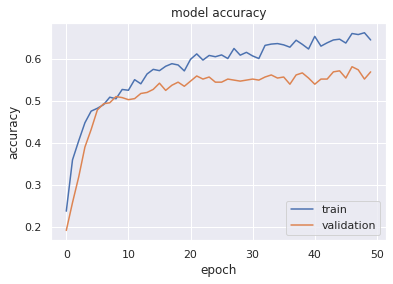

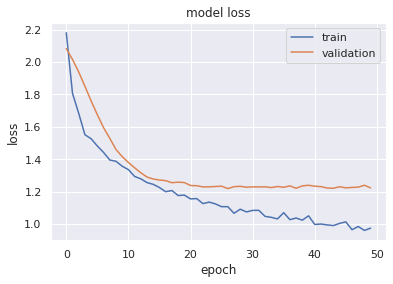

In [35]:
# summarize history for accuracy
plt.plot(summary.history['acc'])
plt.plot(summary.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [36]:
import sklearn
y=model.predict(X_test)
print(np.argmax(y))

4366


In [37]:
y_pred = y.argmax(axis=1)

In [38]:
sklearn.metrics.f1_score(y_test, y_pred, average='micro')

0.5862745098039216

In [39]:
import sklearn.metrics
sklearn.metrics.hamming_loss(y_test, y_pred, sample_weight=None)

0.4137254901960784

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.43      0.46        51
           1       0.86      0.86      0.86        57
           2       0.52      0.57      0.55        56
           3       0.55      0.51      0.53        43
           4       0.66      0.68      0.67        60
           5       0.74      0.67      0.70        60
           6       0.51      0.40      0.45        60
           7       0.51      0.53      0.52        66
           8       0.45      0.60      0.52        57

    accuracy                           0.59       510
   macro avg       0.59      0.58      0.58       510
weighted avg       0.59      0.59      0.59       510



**Saving the model**

In [52]:
model.save("boc_60s/kerasmodel60s.h5")
print("Model Saved")

Model Saved


## Model Prediction on New Data

In [58]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('boc_60s/kerasmodel60s.h5')
# summarize model.
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (BatchNormalizati (None, 110)               440       
_________________________________________________________________
HiddenLayer_1 (Dense)        (None, 1)                 111       
_________________________________________________________________
batch_normalization_3 (Batch (None, 1)                 4         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1)                 0         
_________________________________________________________________
HiddenLayer_2 (Dense)        (None, 3)                 6         
_________________________________________________________________
batch_normalization_4 (Batch (None, 3)                

In [ ]:
# load dataset
dataset = loadtxt("boc_60s/data_1mn_only_9.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))